# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [150]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [151]:
pima_df = pd.read_csv("pima-indians-diabetes+(3).csv")


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [152]:
pima_df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
590,11,111,84,40,0,46.8,0.925,45,1
426,0,94,0,0,0,0.0,0.256,25,0
231,6,134,80,37,370,46.2,0.238,46,1
399,3,193,70,31,0,34.9,0.241,25,1
709,2,93,64,32,160,38.0,0.674,23,1
325,1,157,72,21,168,25.6,0.123,24,0
598,1,173,74,0,0,36.8,0.088,38,1
480,3,158,70,30,328,35.5,0.344,35,1
609,1,111,62,13,182,24.0,0.138,23,0
268,0,102,52,0,0,25.1,0.078,21,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [153]:
print ('Shape of dtataframe is = ' + str(pima_df.shape))
print (pima_df.info())

Shape of dtataframe is = (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [154]:
print  (pima_df.columns )
print (pima_df.mean())
(pima_df.describe().transpose())


Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')
Preg       3.845052
Plas     120.894531
Pres      69.105469
skin      20.536458
test      79.799479
mass      31.992578
pedi       0.471876
age       33.240885
class      0.348958
dtype: float64


,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [155]:
pima_df["Plas"] = pima_df["Plas"].replace( 0 ,pima_df["Plas"].median())
pima_df["Pres"] = pima_df["Pres"].replace( 0 ,pima_df["Pres"].median())
pima_df["skin"] = pima_df["skin"].replace( 0 ,pima_df["skin"].median())
pima_df["test"] = pima_df["test"].replace( 0 ,pima_df["test"].median())
pima_df["mass"] = pima_df["mass"].replace( 0 ,pima_df["mass"].median())
pima_df["pedi"] = pima_df["pedi"].replace( 0 ,pima_df["pedi"].median())
print (pima_df.mean())
pima_df.sample(10)


Preg       3.845052
Plas     121.656250
Pres      72.386719
skin      27.334635
test      94.652344
mass      32.450911
pedi       0.471876
age       33.240885
class      0.348958
dtype: float64


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
61,8,133,72,23,30.5,32.9,0.270,39,1
78,0,131,72,23,30.5,43.2,0.270,26,1
230,4,142,86,23,30.5,44.0,0.645,22,1
737,8,65,72,23,30.5,32.0,0.600,42,0
221,2,158,90,23,30.5,31.6,0.805,66,1
587,6,103,66,23,30.5,24.3,0.249,29,0
545,8,186,90,35,225.0,34.5,0.423,37,1
687,1,107,50,19,30.5,28.3,0.181,29,0
227,3,162,52,38,30.5,37.2,0.652,24,1
433,2,139,75,23,30.5,25.6,0.167,29,0


# Q5 Print the descriptive statistics of each & every column using describe() function

In [156]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


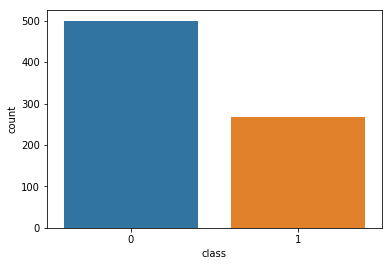

In [157]:
# To check the distributon of class
sns.countplot(pima_df['class'])
pima_df.groupby(["class"]).count()




#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [158]:
from scipy.stats import skew
print ("skewness of 'Preg' is     =  "+str(skew(pima_df['Preg'])))
print ("skewness of 'Plas' is     =  "+str(skew(pima_df['Plas'])))
print ("skewness of 'Pres' is =  "+str(skew(pima_df['Pres'])))
print ("skewness of 'skin' is =  "+str(skew(pima_df['skin'])))
print ("skewness of 'test' is =  "+str(skew(pima_df['test'])))
print ("skewness of 'mass' is =  "+str(skew(pima_df['mass'])))
print ("skewness of 'pedi' is =  "+str(skew(pima_df['pedi'])))
print ("skewness of 'age' is =  "+str(skew(pima_df['age'])))

skewness of 'Preg' is     =  0.8999119408414357
skewness of 'Plas' is     =  0.5345406664125946
skewness of 'Pres' is =  0.14160775043921206
skewness of 'skin' is =  1.220667036561888
skewness of 'test' is =  2.687917738034549
skewness of 'mass' is =  0.5998841409874501
skewness of 'pedi' is =  1.9161592037386292
skewness of 'age' is =  1.127389259531697


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


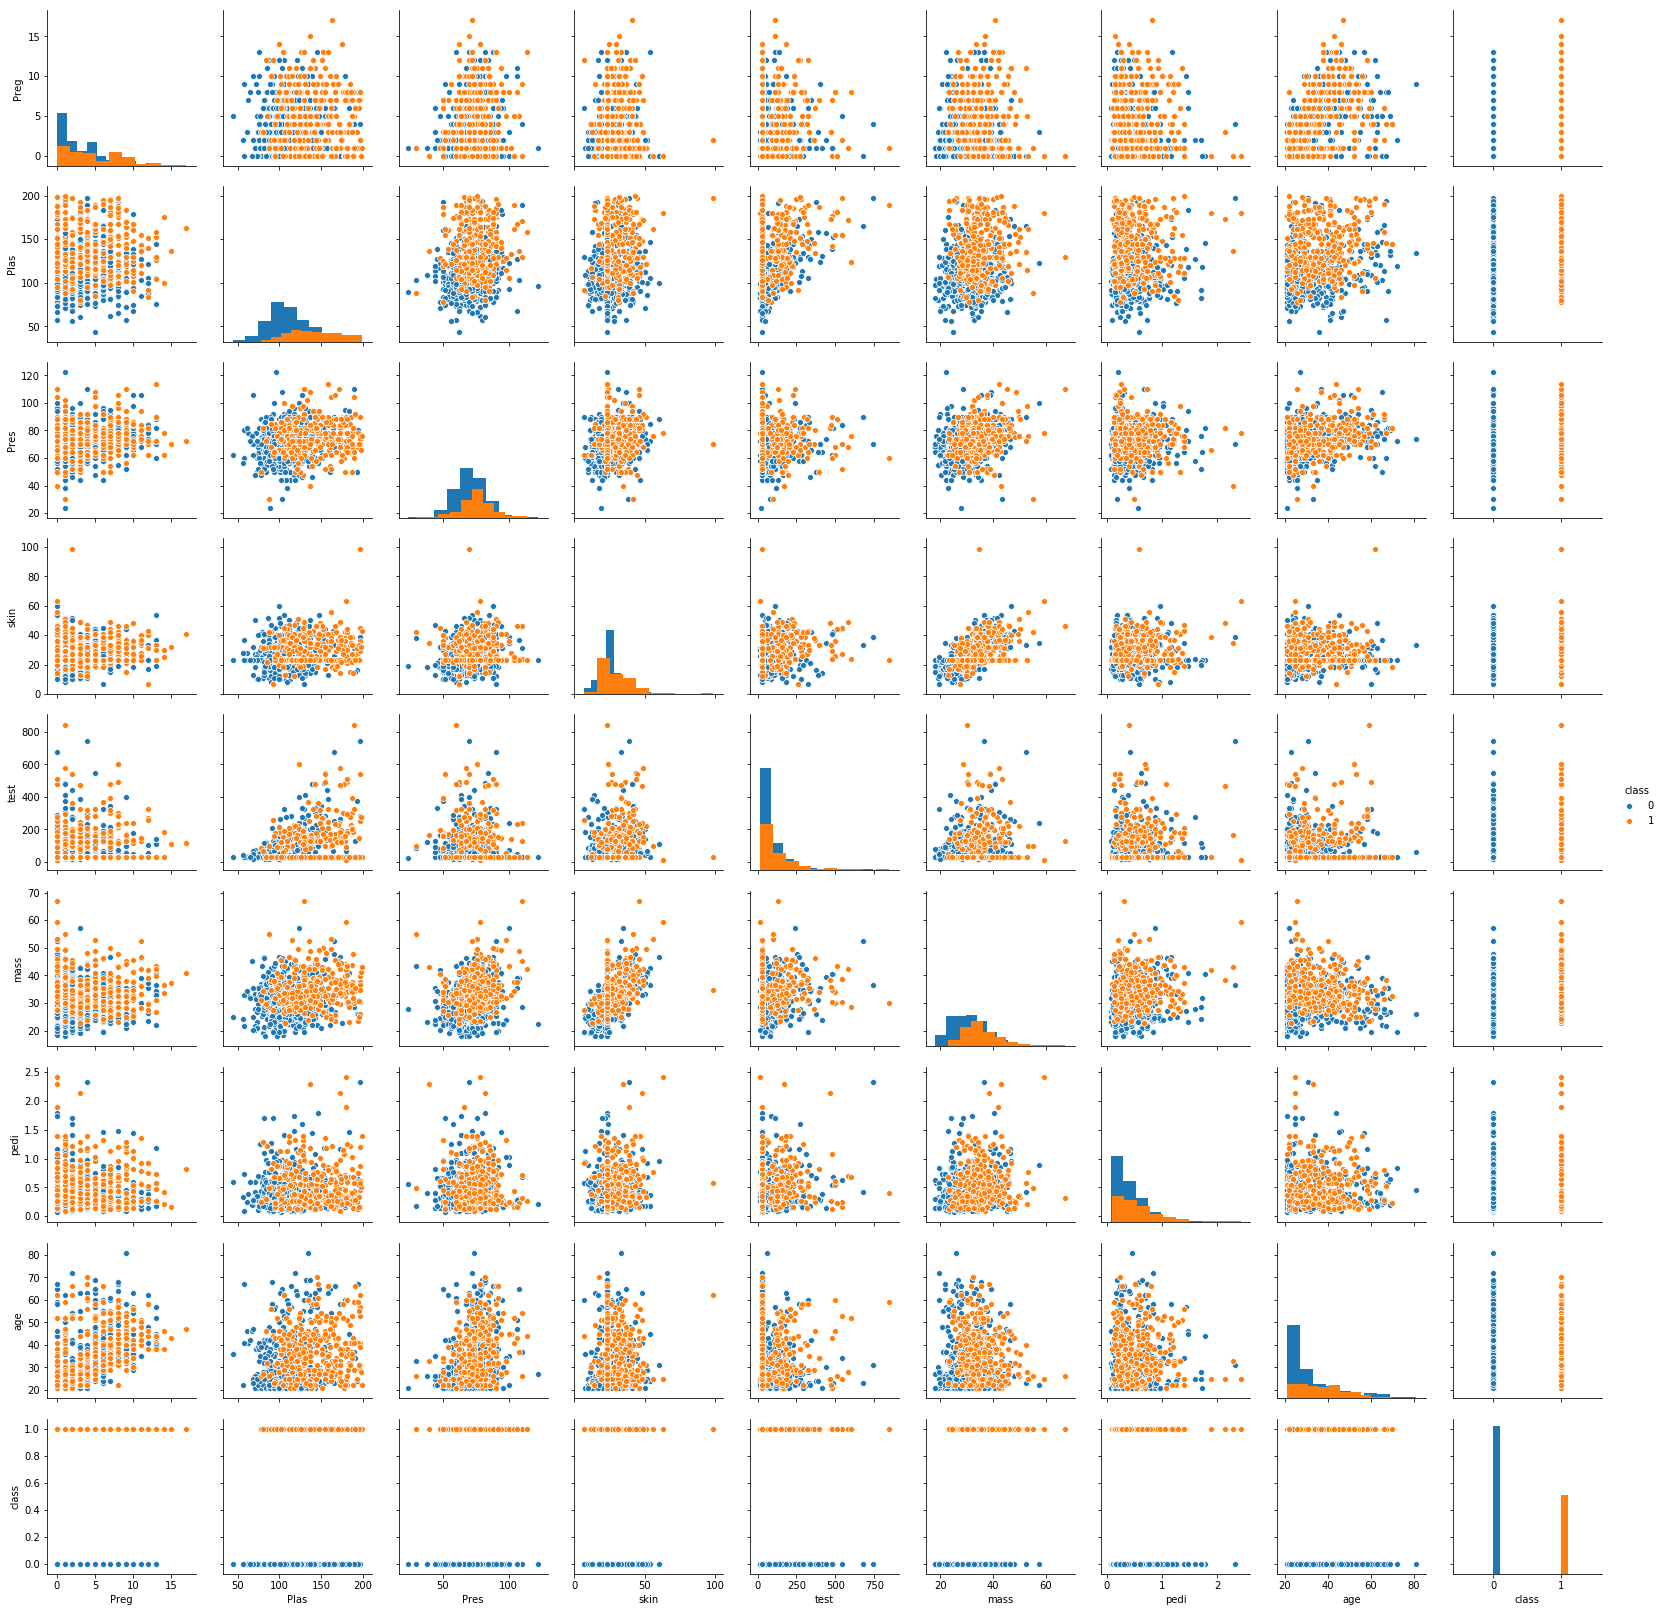

In [159]:
sns.pairplot(pima_df, diag_kind= 'hist' , hue ='class')
#sns.scatterplot(pima_df['mass'],pima_df['Pres'] , hue=pima_df['class'])

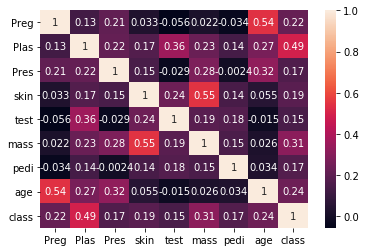

In [161]:
sns.heatmap(pima_df.corr(),annot=True)

## Inference of the above pairplot

- Positive correlation is observed between skin and mass 
- very weak Positive correlation is observed between pregnancy and age  
- very weak correlation is observe between plasma glucose qand test 
- depending on gaussian overlapping we can say that pres,skin,test,mass and pedi are not good features for deffrentiating the  class
- depending on gaussian overlapping we can say that age,preg and plasma glucose are good features for deffrentiating the class 

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [144]:
X = pima_df.drop("class" , axis=1)
y = pima_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=3)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [129]:
#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
max_depth = []
for k in myList:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=k)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='recall')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth is %d" % best_k)

The optimal number of max_depth is 5


In [141]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
dt_model.fit(X_train, y_train)


y_predict = dt_model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [143]:
print ('Accuracy for training = ' +str(dt_model.score(X_train , y_train)))
print ('Accuracy for test = ' +str(dt_model.score(X_test , y_test)))
confusion_matrix(y_test,y_predict)

Accuracy for training = 0.8436482084690554
Accuracy for test = 0.7207792207792207


array([[76, 16],
       [27, 35]], dtype=int64)

Print the feature importance of the decision model - Optional

In [148]:
print (dt_model.feature_importances_)

[0.01566713 0.46567962 0.02213485 0.         0.05314951 0.21232769
 0.0550153  0.17602591]
